In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras import layers
import cv2, os
from random import shuffle
import shutil
import wget
import re

In [30]:
!pip install urllib3

In [31]:
import urllib.error
import urllib.request

In [32]:
import requests, tqdm

In [33]:
def download_file(url, dst_path):
    try:
        with urllib.request.urlopen(url) as web_file:
            data = web_file.read()
            with open(dst_path, mode='wb') as local_file:
                local_file.write(data)
    except urllib.error.URLError as e:
        print(e)

In [34]:
def download_file_to_dir(url, dst_dir):
    download_file(url, os.path.join(dst_dir, os.path.basename(url)))

In [35]:
dst_dir = 'data/temp'

In [36]:
url_zip = "https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip"
download_file_to_dir(url_zip, dst_dir)

FileNotFoundError: [Errno 2] No such file or directory: 'data/temp\\dogvcat.zip'

In [ ]:
if not os.path.exists('./ml-1m'):
    url = "https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip"
    response = requests.get(url, stream=True)
    total_length = response.headers.get('content-length')
    bar = tqdm.tqdm_notebook(total=int(total_length))
    with open('./ml-1m.zip', 'wb') as f:
        for data in response.iter_content(chunk_size=4096):
            f.write(data)
            bar.update(4096)

In [41]:
import zipfile

In [42]:
zip_ref = zipfile.ZipFile('./ml-1m.zip', 'r')
zip_ref.extractall('.')
zip_ref.close()

In [ ]:
url = "https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip"

In [11]:
url = "https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip"
!unzip -qo dogvcat.zip

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'unzip'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [43]:
train_dir= "./datset/training"
test_dir= "./datset/testing/"

# Data Augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                shear_range = 0.2,
                                                                zoom_range = 0.2,
                                                                rotation_range=20,
                                                                width_shift_range=0.1,
                                                                height_shift_range=0.1,
                                                                horizontal_flip = True, 
                                                                validation_split= 0.2)
# Data를 batch size 씩 받아오기, 받아오는 속성 지정
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(50,50), 
                                                    color_mode='rgb', #'grayscale', 
                                                    batch_size=20, 
                                                    class_mode='binary', 
                                                    subset= 'training')
val_generator = train_datagen.flow_from_directory(train_dir, 
                                                  target_size=(50,50), 
                                                  color_mode='rgb', #'grayscale', 
                                                  batch_size=20, 
                                                  class_mode='binary', 
                                                  subset= 'validation')

Found 19860 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.


In [44]:
x_train, y_train = next(train_generator)
x_train.shape

(20, 50, 50, 3)

In [45]:
y_train

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0.], dtype=float32)

(20, 50, 50, 3)
(20,)


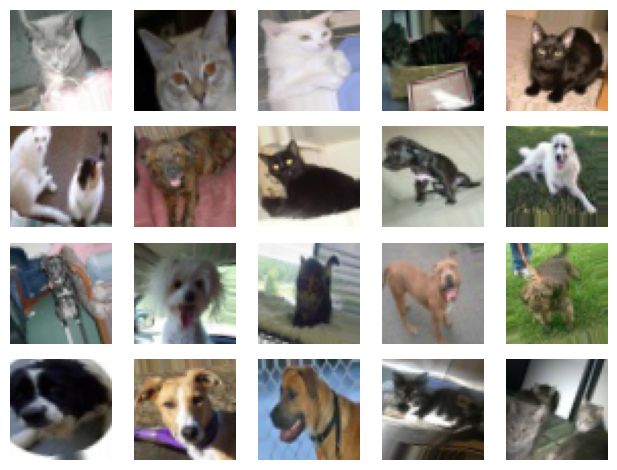

In [46]:
batch_size = 20
img_iter = train_datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
print(x.shape)
print(y.shape)

fig, ax = plt.subplots(nrows=4, ncols=5)
ax = ax.flatten()
for img, ax in zip(x_train, ax):
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(50,50,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_steps = len(train_generator) / batch_size
val_steps = len(val_generator) / batch_size
epoch = 200

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=train_steps,  
                    epochs=epoch,
                    validation_data=val_generator, 
                    validation_steps=val_steps)

Epoch 1/200
49/49 [==============================] - 3s 63ms/step - loss: 0.4135 - accuracy: 0.8090 - val_loss: 0.4154 - val_accuracy: 0.8154
Epoch 2/200
49/49 [==============================] - 2s 41ms/step - loss: 0.4379 - accuracy: 0.8060 - val_loss: 0.4147 - val_accuracy: 0.8038
Epoch 3/200
49/49 [==============================] - 2s 39ms/step - loss: 0.4356 - accuracy: 0.7920 - val_loss: 0.4314 - val_accuracy: 0.8000
Epoch 4/200
49/49 [==============================] - 2s 45ms/step - loss: 0.4657 - accuracy: 0.7990 - val_loss: 0.4205 - val_accuracy: 0.8346
Epoch 5/200
49/49 [==============================] - 2s 44ms/step - loss: 0.4384 - accuracy: 0.7990 - val_loss: 0.4144 - val_accuracy: 0.8154
Epoch 6/200
49/49 [==============================] - 3s 62ms/step - loss: 0.4045 - accuracy: 0.8150 - val_loss: 0.4418 - val_accuracy: 0.8115
Epoch 7/200
49/49 [==============================] - 2s 40ms/step - loss: 0.4366 - accuracy: 0.7900 - val_loss: 0.4244 - val_accuracy: 0.7846
Epoch 

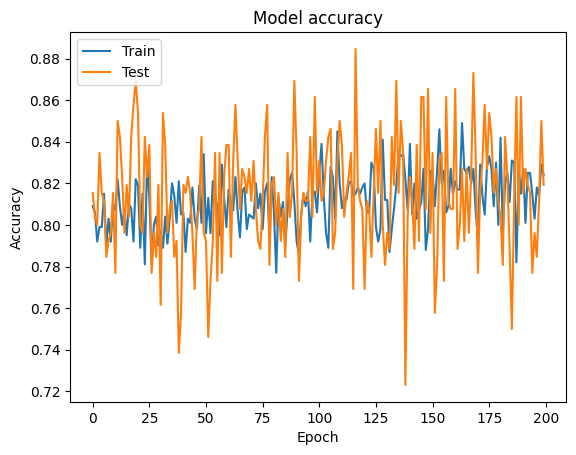

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

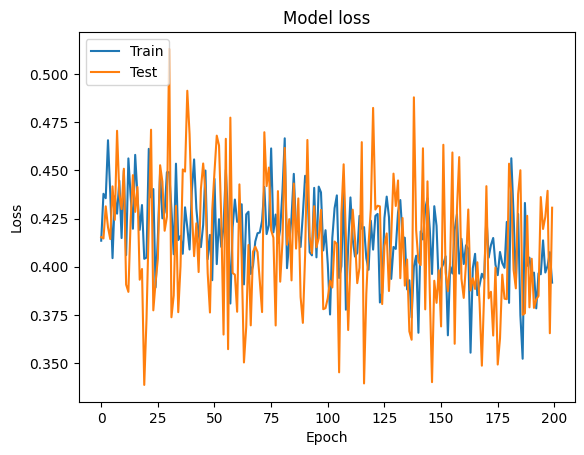

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('dog-cat-model2.h5')

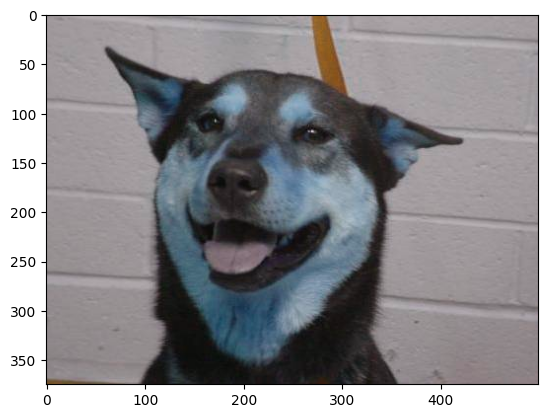

(50, 50, 3)
(1, 50, 50, 3)
1/1 [==============================] - 0s 81ms/step
dog


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def Single_Image_Prediction(file):
    # image = load_img(file, color_mode='rgb', target_size=(128, 128))
    image = cv2.imread(file)
    plt.imshow(image)
    plt.show()
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (50, 50))
    img_arr = img_to_array(image)
    img_arr = img_arr/255.
    print(img_arr.shape)
    # np_image = np.expand_dims(img_arr, axis=0)
    np_image = np.reshape(img_arr,(1,50,50,3))
    
    return np_image

image = Single_Image_Prediction('./datset/testing/2.jpg')
print(image.shape)
pred_value = model.predict(image)

if pred_value < 0.5:
    print('cat')
else:
    print('dog')